# Simple Linear Regression

In this notebook, we'll build a linear regression model to predict `Sales` using an appropriate predictor variable.

1. Reading and understanding the data
2. Training the model
3. Residual analysis
4. Predicting and evaluating on the model 

## Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import statsmodels
import statsmodels.api as sm 
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [3]:
adv = pd.read_csv('advertising.csv')
adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
adv.shape

(200, 4)

In [5]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
adv.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# visualize the data

<AxesSubplot:xlabel='TV', ylabel='Sales'>

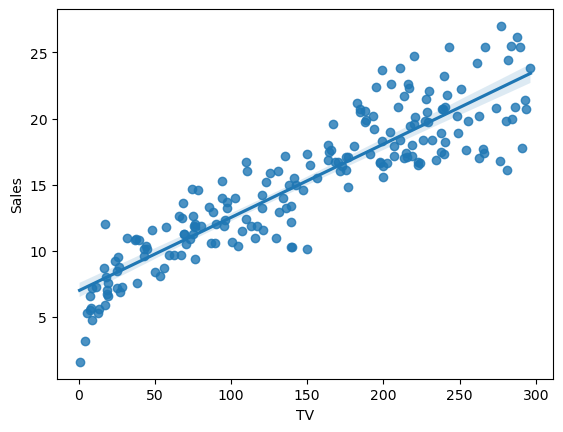

In [7]:
sns.regplot(x = 'TV',y= 'Sales',data = adv)   # regression plot

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

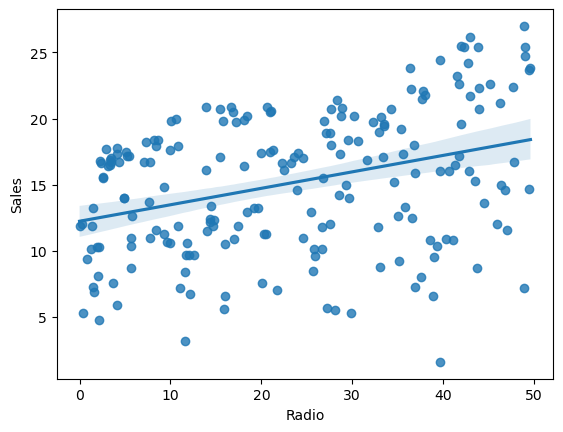

In [8]:
sns.regplot(x = 'Radio',y= 'Sales',data = adv)

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

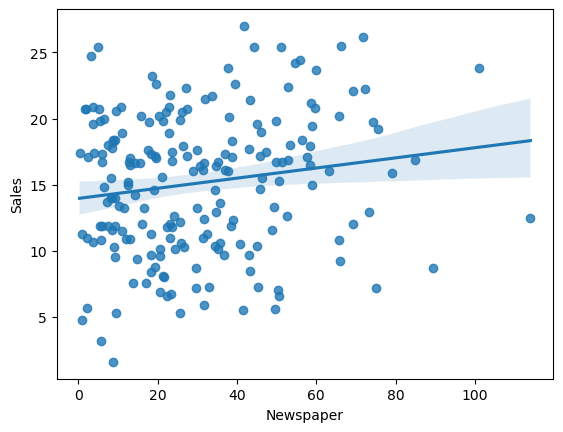

In [9]:
sns.regplot(x = 'Newspaper',y= 'Sales',data = adv)

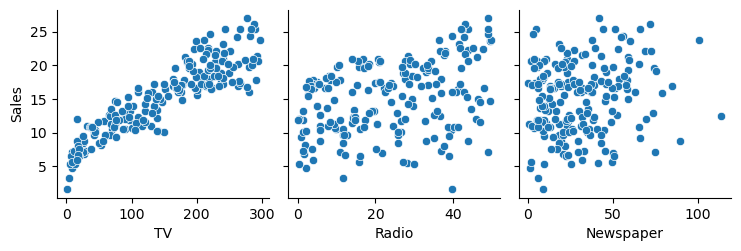

In [10]:
sns.pairplot(data = adv,x_vars = ['TV','Radio','Newspaper'],y_vars = 'Sales')

In [13]:
# through this we can say it that the tv v/s sales  look like a very +ve raltionship i.e. high +ve corelation btwn them
# we can expect the model to be pretty confident as compare to radio and newspaper ....

# radio also have the +ve relationship but less than the tv and it is even lesser confident and -ve also with the newspaper


# this is what we expect intitutively from the model right now 

In [14]:
adv.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<AxesSubplot:>

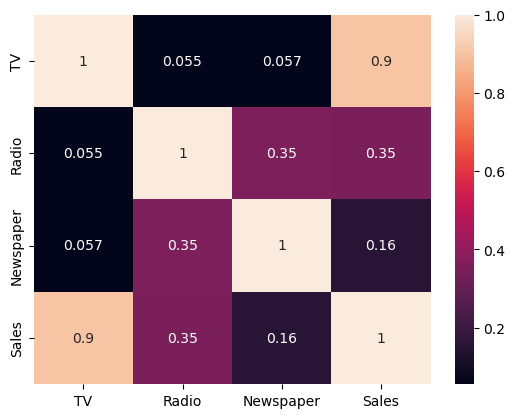

In [15]:
sns.heatmap(adv.corr(),annot = True)

---
## Step 3: Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept or constant
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

---

In [16]:
import statsmodels
import statsmodels.api as sm 

# steps:
- create X and y 
-create train and test (70-30,80-20)
-train your model on your training set (i.e. learn the coeffiecient)
-evaluate the model (training set, test set)

In [17]:
# creating x and y  where x is capital and y is in lower case

X = adv['TV']
y = adv['Sales']

In [18]:
# train - test split 
from sklearn.model_selection import train_test_split 

In [19]:
X_train ,X_test , y_train , y_test = train_test_split(X,y,train_size = 0.70,random_state = 100)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140,)
(140,)
(60,)
(60,)


In [20]:
X_train

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
       ...  
87     110.7
103    187.9
67     139.3
24      62.3
8        8.6
Name: TV, Length: 140, dtype: float64

In [21]:
# training the model

X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [22]:
# y = c + x1 . m1
# y = c.const + m1.TV

In [23]:
# fiiting the model 
# OLS = ordinary least squares
# creating object of this class i.e. linear regression


lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()


In [24]:
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [26]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Mon, 06 Feb 2023   Prob (F-statistic):           1.52e-52
Time:                        12:00:28   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

####  Looking at some key statistics from the summary

The values we are concerned with are - 
1. The coefficients and significance (p-values)
2. R-squared
3. F statistic and its significance

##### 1. The coefficient for TV is 0.054, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance. 

##### 2. R - squared is 0.816
Meaning that 81.6% of the variance in `Sales` is explained by `TV`

This is a decent R-squared value.

###### 3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

---
The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

$ Sales = 6.948 + 0.054 \times TV $

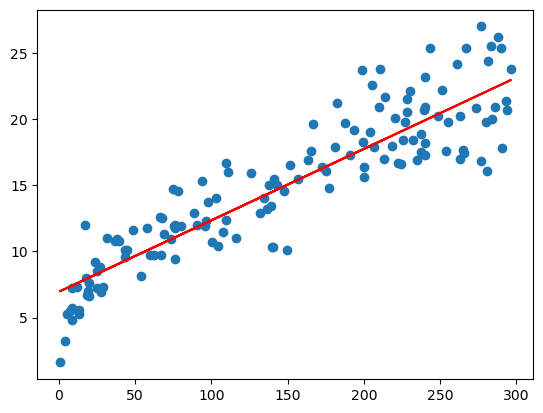

In [28]:
plt.scatter(X_train, y_train)   # actual y values 
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')    # predicted y values in the line i.e. y_train_pred
plt.show()



## Step 4: Residual analysis 
To validate assumptions of the model, and hence the reliability for inference

#### Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), 
let us plot the histogram of the error terms and see what it looks like.

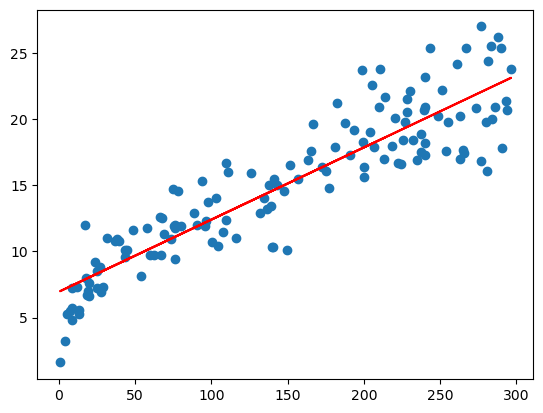

In [31]:
# for the prediction we can also use : The predict function
plt.scatter(X_train, y_train)
y_train_pred = lr_model.predict(X_train_sm)
plt.plot(X_train, y_train_pred, 'r')    
plt.show()

Error Analysis
error= f(y_train, y_train_pred)

In [33]:
res = (y_train - y_train_pred)

# plotting the residual

C:\Users\simra\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


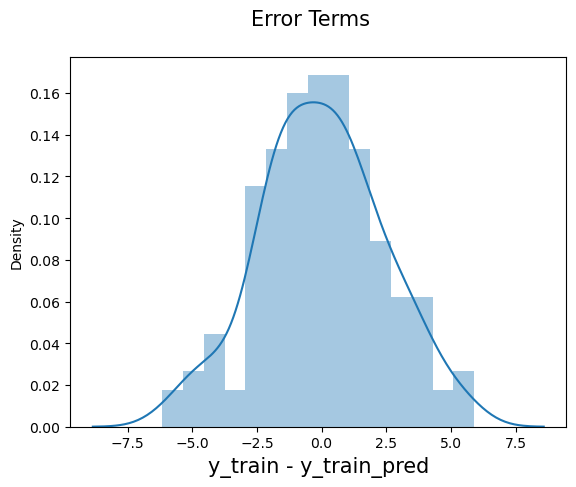

In [34]:
fig = plt.figure()
sns.distplot(res, bins = 15)                                # residual
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

The residuals are following the normally distributed with a mean 0. All good!

#### Looking for patterns in the residuals

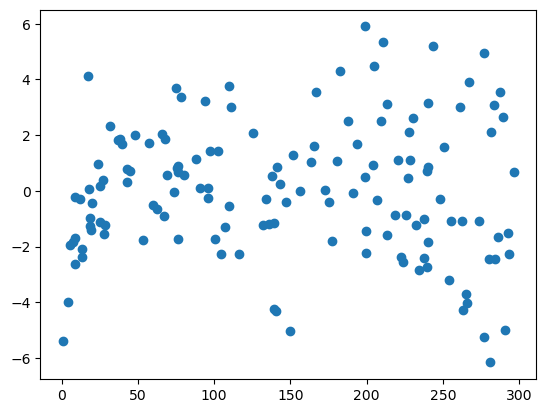

In [35]:
plt.scatter(X_train,res)
plt.show()

We are confident that the model fit isn't by chance, and has decent predictive power. 
The normality of residual terms allows some inference on the coefficients.

Although, the variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.

As you can see, the regression line is a pretty good fit to the data

## Step 5: Predictions on the Test Set

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the `X_test` data like you did for `X_train` and then you can simply go on and predict the y values corresponding to `X_test` using the `predict` attribute of the fitted regression line.

In [38]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)


In [42]:
# Predict the y values corresponding to X_test_sm
y_test_pred = lr_model.predict(X_test_sm)
y_test_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

##### Looking at the RMSE

In [44]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

2.019296008966233

###### Checking the R-squared on the test set

In [45]:
r_squared = r2_score(y_true = y_test, y_pred = y_test_pred)
r_squared

0.7921031601245658

In [47]:
# we can aslo do the r2 on train

r_2 = r2_score(y_true = y_train, y_pred = y_train_pred)
r_2

0.8157933136480389

##### Visualizing the fit on the test set

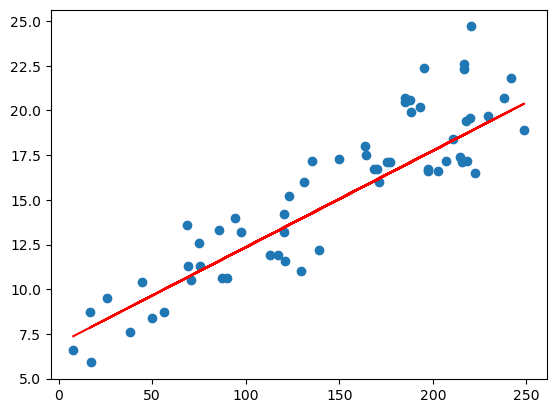

In [48]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()

### Linear Regression using `linear_model` in `sklearn`

Apart from `statsmodels`, there is another package namely `sklearn` that can be used to perform linear regression. We will use the `linear_model` library from `sklearn` to build the model. Since, we hae already performed a train-test split, we don't need to do it again.

There's one small step that we need to add, though. When there's only a single feature, we need to add an additional column in order for the linear regression fit to be performed successfully.

steps in sklearn model building

1. create an object of linear regression 

2. fit the model 

3. see the params , make prediction (train,test) 

4. evaluate (r2, etc.)

In [49]:
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [50]:
X_train_lm.shape

(140,)

In [55]:
# reshape x_train to (140,1)

X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)


In [56]:
print(X_train_lm.shape)
print(y_train_lm.shape)
print(X_test_lm.shape)
print(y_test_lm.shape)

(140, 1)
(140,)
(60, 1)
(60,)


In [51]:
from sklearn.linear_model import LinearRegression

In [57]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

# Fit the model using lr.fit()
lm.fit(X_train_lm, y_train_lm)

LinearRegression()

In [58]:
print(lm.intercept_)
print(lm.coef_)

6.9486832000013585
[0.05454575]


The equationwe get is the same as what we got before!

$ Sales = 6.948 + 0.054* TV $

Sklearn linear model is useful as it is compatible with a lot of sklearn utilites (cross validation, grid search etc.)

In [59]:
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)


In [61]:
print(r2_score(y_true = y_train, y_pred = y_train_pred))
print(r2_score(y_true = y_test, y_pred = y_test_pred))     

0.8157933136480388
0.792103160124566
